# Multilayer Perceptrons

A multilayer perceptron (MLP) has the same structure of a single layer perceptron with one or more hidden layers. We could add an arbitrary number of hidden layers to the MLP to create deeper network architectures. But too many hidden layers or neurons can lead to overfitting. Even with a single hidden-layer network, given enough nodes, and right set of weights, we can model any function. Just because a single hidden-layer network can learn any function doesn't mean that you should try to solve all of your problems with single hidden-layer networks. In fact, deeper architectures are commonly used for real-world problems due to their improved representational capacity and generalization abilities.

### Hidden Layers

Anything that is not the input or output layer is technically a hidden layer. This may be convolutional layers, pooling layers, or any other custom layer you may wish to create. Basically, hidden layers empower neural networks to capture complex relationships, learn non-linear functions, perform feature extraction, identifying and separating relevant information from input data necessary for making predictions or decisions.

### Creating Neural Network Models in Python

There are several high-level abstraction libraries in Python for creating neural networks. These libraries provide easy-to-use interfaces for building, training, and deploying neural networks without requiring deep knowledge of the underlying mathematical principles. **PyTorch** and **Keras** are the two most commonly used deep learning libraries in Python. Both have large and active communities, extensive documentation, and are backed by major companies (Google for TensorFlow/Keras and Facebook for PyTorch).  I will explain creating deep neural networks using both Keras and PyTorch.

### Generate Sample dataset

Before start building our network, let's prepare a synthetic dataset.

The **make_classification** function is used to generate a synthetic classification dataset. It creates a dataset with a specified number of samples, features, and classes.

**StandardScaler** is used to standardize the features by removing the mean and scaling to unit variance. This step is optional but recommended, especially for algorithms that are sensitive to feature scaling, such as neural networks.

In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a more realistic sample dataset. Add "random_state" to get the consistant result.
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shapes of the generated data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


### Visualize the dataset pattern

In order to visualize the dataset pattern, I'm using t-SNE, a dimensionality reduction technique, to reduce the dimensionality of the data X to two dimensions (n_components=2). The resulting lower-dimensional representation is then plotted using a scatter plot, where each point represents a data sample and its position is determined by the two t-SNE dimensions. The color of each point is determined by the corresponding class label y, and the plot is labeled with appropriate axis titles.

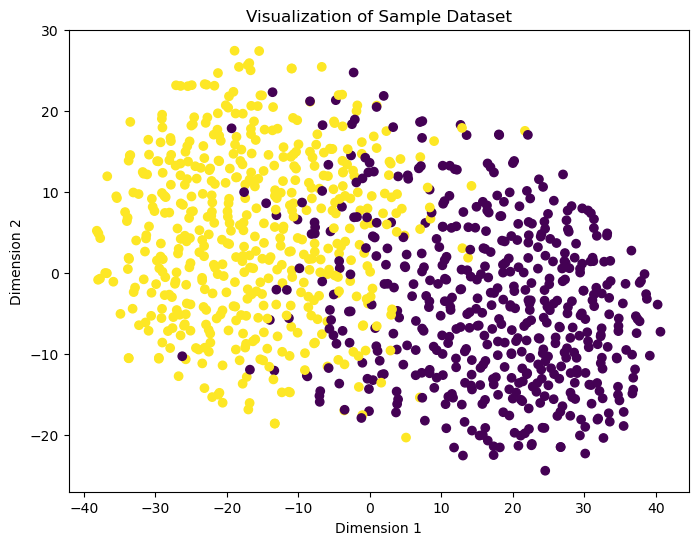

In [55]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
# Representing X with two dimensions.
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('Visualization of Sample Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### Using Keras

**How do we know the number of layers and their types?**

Determining the number of layers and their types in a neural network architecture depends on various factors, including the specific problem you are trying to solve, the complexity of the data, and your computational resources.

You may need to experiment with different architectures to find the one that best balances performance and computational efficiency. This often involves trying different numbers of layers, different types of layers (e.g., dense, convolutional, recurrent), and different activation functions.

Generally, you need a network large enough to capture the structure of the problem

In this example, let's use a fully-connected network structure with four layers. Fully connected layers are defined using the Dense class. You can specify the number of neurons or nodes in the layer as the **first argument** and the activation function using the **activation** argument.

Also, you will use the rectified linear unit activation function referred to as **ReLU** on the first three layers and the **Softmax** function in the output layer.

ReLU gives better performance compared to other activation functions like Sigmoid and Tanh. Softmax activation function is used in the output layer because we have a classification task with 2 classes.  Softmax squashes the raw output scores into probabilities that sum up to 1, making it suitable for multi-class classification problems.

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_shape=(20,)))

# Add hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Add output layer
model.add(Dense(units=2, activation='softmax'))

### Compile Keras Model

After defining the model, you need to compile it, which define how the model will be trained. When compiling, you must specify some additional properties required when training the network. Remember that training a network is the process of adjusting the parameters (weights and biases) of a machine learning model based on input data to minimize a defined loss function, with the aim of improving the model's ability to make accurate predictions.

Following are the parameters need to pass when calling the model's **compile** method:
**Loss Function** - which is a measure of how well the model is performing on the training data.
**Optimizer** - which determines how the model's weights are updated during training to minimize the loss function.
**Metrics** - this is an additional evaluation metrics that you want to monitor during training and evaluation. These metrics provide insights into the model's performance beyond the loss function.

You can also specify additional configurations such as **learning rate**, **regularization techniques** (e.g., L1 or L2 regularization), and **custom callbacks** to be used during training.



In [87]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

When you call the **compile()** method on a Keras or TensorFlow model, the specified configurations are validated, and the computational graph for training the model is constructed. However, the actual training process doesn't start until you call the **fit()** method, where the model is trained on the training data using the specified configurations.

### Fit Keras Model

The **fit()** method is like the coach that helps your neural network learn from data. It takes your model and a bunch of data you've collected, and it teaches the model how to make better predictions by adjusting its internal settings (parameters) based on that data. It's like a training session where the model gets better and better at its task with each round of practice (epoch).

Training occurs over epochs, and each epoch is split into batches

**Epoch:** is a single pass through the entire dataset. In other words, it epoch represents one complete cycle of training where the model has seen and learned from every example in the dataset once. During an epoch, the model goes through multiple batches, updating its parameters after each batch. 

**Batch:** is a subset of the training data that is processed together in one forward and backward pass of the 





In [67]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6076 - loss: 0.6269 - val_accuracy: 0.9100 - val_loss: 0.3858
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9027 - loss: 0.3196 - val_accuracy: 0.9400 - val_loss: 0.1918
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9125 - loss: 0.2091 - val_accuracy: 0.9400 - val_loss: 0.1708
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.2014 - val_accuracy: 0.9550 - val_loss: 0.1944
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9309 - loss: 0.1748 - val_accuracy: 0.9500 - val_loss: 0.1815
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9335 - loss: 0.1512 - val_accuracy: 0.9450 - val_loss: 0.1887
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.1214 - val_accuracy: 0.9500 - val_loss: 0.1820
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9533 - loss: 0.1263 - val_accuracy: 0.9350 - val_loss:

### Evaluate Keras Model

In [68]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9710 - loss: 0.0952
Accuracy: 96.50


### Save the Keras model

An entire model can be saved in three different file formats (the new **.keras** format and two legacy formats: **SavedModel**, and **HDF5**). Saving a model as path/to/model.keras automatically saves in the latest format.

In [69]:
# Save the entire model as a `.keras` zip archive.
model.save('my_model.keras')

#### Reload a fresh Keras model from the .keras zip archive:

In [73]:
new_model = keras.models.load_model('my_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,384 (114.79 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,590 (76.53 KB)

### Checkpoint callback options

In Keras, a checkpoint is a callback that can be used during training to save the model's weights to a file at specified intervals. This allows you to save the model's progress during training, ensuring that you can resume training from the last saved point in case the training process is interrupted.

Checkpoints are particularly useful for long and computationally intensive training processes, where it's important to periodically save the model's weights to avoid losing progress. They enable you to monitor the model's performance over time, experiment with different hyperparameters, and even implement techniques like early stopping.

In [95]:
from keras.callbacks import ModelCheckpoint
import math

batch_size = 32
n_batches = len(X_train) / batch_size
n_batches = math.ceil(n_batches)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath='model_weights.weights.h5', 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*n_batches)

# Train the model with the new callback
model.fit(X_train, y_train,
          epochs=50, 
          batch_size=batch_size, 
          callbacks=[cp_callback],
          validation_data=(X_test, y_test),
          verbose=0)


Epoch 5: saving model to model_weights.weights.h5

Epoch 10: saving model to model_weights.weights.h5

Epoch 15: saving model to model_weights.weights.h5

Epoch 20: saving model to model_weights.weights.h5

Epoch 25: saving model to model_weights.weights.h5

Epoch 30: saving model to model_weights.weights.h5

Epoch 35: saving model to model_weights.weights.h5

Epoch 40: saving model to model_weights.weights.h5

Epoch 45: saving model to model_weights.weights.h5

Epoch 50: saving model to model_weights.weights.h5


### How to use the model for prediction?
To utilize the model for making predictions on a new dataset, we've employed the same logic used to create the training data for generating the new dataset.
We use the **predict()** method to make predictions on the test data (X_test) and obtain the predicted labels (y_pred).

Formatted for a side-by-side comparison of the predicted labels and actual labels. 

In [111]:
# Generate a new dataset for testing
X_test, y_test = make_classification(n_samples=10, n_features=20, n_classes=2, n_clusters_per_class=1)

# Predict on the test data
y_pred = model.predict(X_test)

# # Print the predicted labels
# print("Predicted labels:")
# print(y_pred)

# Convert predicted probabilities to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Convert the arrays to strings before printing
y_test_str = [str(label) for label in y_test]
y_pred_binary_str = [str(label) for label in y_pred_binary]

# Print side-by-side comparison of actual and predicted labels
print("{:<15} {:<15}".format("Actual Label", "Predicted Label"))
for true_label, pred_label in zip(y_test_str, y_pred_binary_str):
    print("{:<15} {:<15}".format(true_label, pred_label))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual Label    Predicted Label
1               [1 0]          
1               [0 1]          
0               [1 0]          
0               [1 0]          
0               [1 0]          
0               [1 0]          
1               [1 0]          
0               [1 0]          
1               [0 1]          
1               [1 0]          
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7000 - loss: 5.5152
Test Loss: 5.515214920043945
Test Accuracy: 0.699999988079071


### Using PyTorch

The simplest model using PyTorch can be defined using **Sequential** class, which is just a linear stack of layers connected in tandem.

In [121]:
import torch
import torch.nn as nn

# Define the model using nn.Sequential()
model = nn.Sequential(
    nn.Linear(20, 64),  # 20 features in the dataset
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)

# Print model architecture
print(model)

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=2, bias=True)
)


Another way of using Sequential is to pass in an ordered dictionary with the layers in the desired order. You can assign names to each layer as below:

In [122]:
import torch
import torch.nn as nn
from collections import OrderedDict

# Define the model using OrderedDict
layers = OrderedDict([
    ('fc1', nn.Linear(20, 64)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(64, 64)),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(64, 2))
])

model = nn.Sequential(layers)

# Print model architecture
print(model)

Sequential(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=2, bias=True)
)


#### Layers in PyTorch

PyTorch provides a variety of modules that can be used to build neural network architecture. Some of the commonly used types of layers:

**Linear Layer (nn.Linear):** Also known as fully connected or dense layer, it performs linear transformation on the input data by multiplying it with a weight matrix and adding a bias term.

**Convolutional Layer (nn.Conv2d, nn.ConvTranspose2d):** Convolutional layers are used for processing spatial data such as images. They perform convolution operations to extract features from the input data.

**Pooling Layer (nn.MaxPool2d, nn.AvgPool2d):** Pooling layers are used to downsample the spatial dimensions of the input data while retaining important features. Max pooling and average pooling are common types of pooling operations.

**Dropout Layer (nn.Dropout, nn.Dropout2d, nn.Dropout3d):** Dropout layers are used for regularization by randomly setting a fraction of input units to zero during training to prevent overfitting.


#### Loss Function and Model Optimizers

A **loss function** quantifies how well the model is performing on the training data by measuring the discrepancy between the predicted outputs and the true targets (labels).

The goal during training is to minimize this discrepancy, effectively reducing the error of the model's predictions.

PyTorch provides a wide range of loss functions for various tasks, such as classification (nn.CrossEntropyLoss), regression (nn.MSELoss), and others.


**Model Optimizers** are algorithms used to update the parameters (weights and biases) of the neural network during training, with the objective of minimizing the loss function.

They work by computing the gradients of the loss function with respect to the model parameters and adjusting the parameters in the direction that reduces the loss.

Common optimizers in PyTorch include Stochastic Gradient Descent (SGD), Adam, Adagrad, and RMSprop.

Each optimizer has its own hyperparameters, such as learning rate, momentum, and weight decay, which can affect the training process and the performance of the model.


PyTorch doesn't have a dedicated function for model training and evaluation, so its our responsibility to write the training loop.

In [128]:
# Define loss function and optimizer
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the model in training mode
model.train()

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
     # Forward pass
    outputs = model(X_train_tensor)
    
    # Compute loss
    loss = loss_fn(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss for monitoring training progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training complete!')

Epoch [1/100], Loss: 0.0001
Epoch [2/100], Loss: 0.0001
Epoch [3/100], Loss: 0.0001
Epoch [4/100], Loss: 0.0001
Epoch [5/100], Loss: 0.0000
Epoch [6/100], Loss: 0.0000
Epoch [7/100], Loss: 0.0000
Epoch [8/100], Loss: 0.0000
Epoch [9/100], Loss: 0.0000
Epoch [10/100], Loss: 0.0000
Epoch [11/100], Loss: 0.0000
Epoch [12/100], Loss: 0.0000
Epoch [13/100], Loss: 0.0000
Epoch [14/100], Loss: 0.0000
Epoch [15/100], Loss: 0.0000
Epoch [16/100], Loss: 0.0000
Epoch [17/100], Loss: 0.0000
Epoch [18/100], Loss: 0.0000
Epoch [19/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [21/100], Loss: 0.0000
Epoch [22/100], Loss: 0.0000
Epoch [23/100], Loss: 0.0000
Epoch [24/100], Loss: 0.0000
Epoch [25/100], Loss: 0.0000
Epoch [26/100], Loss: 0.0000
Epoch [27/100], Loss: 0.0000
Epoch [28/100], Loss: 0.0000
Epoch [29/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [31/100], Loss: 0.0000
Epoch [32/100], Loss: 0.0000
Epoch [33/100], Loss: 0.0000
Epoch [34/100], Loss: 0.0000
Epoch [35/100], Loss: 0

**Test the trained model using the test dataset**

To test the model using the test dataset, you'll follow a similar process as training, but there is no loss calculation and parameter updates.

In [130]:
# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Set the model in evaluation mode
model.eval()

# Disable gradient computation during evaluation
with torch.no_grad():
    # Forward pass on test data
    outputs = model(X_test_tensor)
    
    # Compute predictions
    _, predicted = torch.max(outputs, 1)
    
    # Calculate accuracy
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = correct / total
    
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.6000


**Test data visualization**

Just to the see the test dataset distribution in the 2-dimensional space using the dimensionality reduction technique t-SNE.

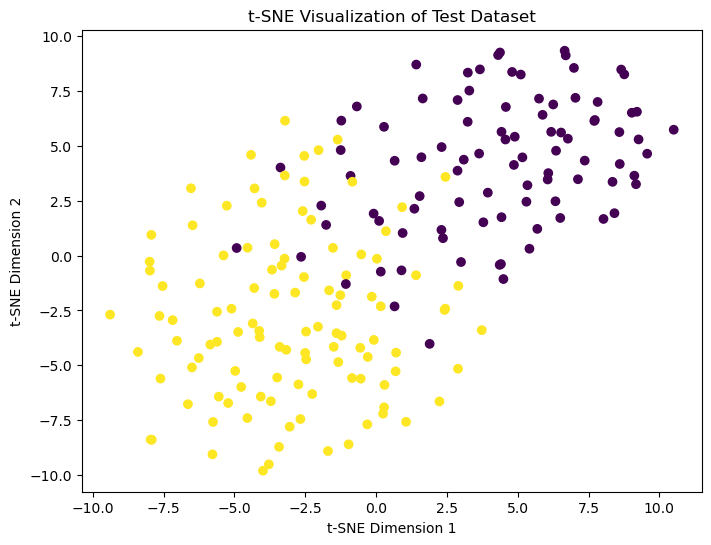

In [53]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# Dimensionality reduction with t-SNE
X_test_tsne = tsne.fit_transform(X_test)

# Plot the t-SNE representation of the test dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization of Test Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

#### Save the Model

If you want to save the model, use **pickle** library from Python. This method can be accessed from PyTorch also:

In [56]:
torch.save(model, "my_model.pickle")

Using the above function call, you have the entire model object saved to the current directory as a pickle file.To retrieve the model use **load()** function:

In [63]:
model = torch.load("my_model.pickle")

But the recommended way of saving a model is to leave the model design in code and keep only the weights as below:

In [60]:
torch.save(model.state_dict(), "my_model.pickle")

The state_dict() function extracts only the states (i.e., weights in a model). To retrieve it, you need to rebuild the model from scratch and then load the weights as follow:

In [118]:
model = nn.Sequential(
    nn.Linear(20, 64),  # 20 features in the dataset
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)

model.load_state_dict(torch.load("my_model.pickle"))

<All keys matched successfully>

### Use PyTorch model for prediction

In [135]:
import numpy as np

# Generate a new test dataset
X_test, y_test = make_classification(n_samples=25, n_features=20, n_classes=2, n_clusters_per_class=1)

# Convert the test dataset and labels to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Assuming class indices are provided

# Set the model to evaluation mode
model.eval()

# Perform prediction
with torch.no_grad():  # Disable gradient calculation
    y_pred = model(X_test_tensor)

# Convert predictions to probabilities using softmax
softmax = nn.Softmax(dim=1)
y_pred_probs = softmax(y_pred)

# Convert probabilities to class labels
_, y_pred_labels = torch.max(y_pred_probs, 1)

# Convert PyTorch tensors to numpy arrays for easier handling
y_pred_labels_np = y_pred_labels.numpy()

# Calculate accuracy
accuracy = (y_pred_labels_np == y_test).astype(int).mean()

# Calculate loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(y_pred, y_test_tensor).item()

# Print or use the side-by-side comparison of predicted labels and actual labels
print("{:<15} {:<15} {:<15}".format("Actual Label", "Predicted Label", "Correct"))
for true_label, pred_label, correct in zip(y_test, y_pred_labels_np, y_test == y_pred_labels_np):
    print("{:<15} {:<15} {:<15}".format(true_label, pred_label, correct))

# Print accuracy and loss
print("Accuracy:", accuracy)
print("Loss:", loss)

Actual Label    Predicted Label Correct        
0               1               0              
0               0               1              
0               0               1              
1               0               0              
0               0               1              
0               0               1              
1               1               1              
1               1               1              
1               0               0              
0               0               1              
1               1               1              
1               1               1              
1               1               1              
1               0               0              
1               1               1              
1               0               0              
0               1               0              
0               0               1              
0               0               1              
0               0               1       

### Summary

You have the flexibility to choose between PyTorch or Keras as your preferred framework for building machine learning models. PyTorch offers a dynamic computational graph approach, allowing for more flexibility and control over model architecture and training process. With PyTorch, you can define your model using Python classes and have fine-grained control over every aspect of your neural network. On the other hand, Keras provides a higher-level abstraction, making it easier and quicker to build neural networks, especially for beginners or those looking for rapid prototyping. With its simple and intuitive API, Keras allows you to quickly define sequential or functional models with fewer lines of code. Whether you prioritize flexibility and control or simplicity and ease of use, both PyTorch and Keras offer powerful tools and extensive documentation to help you build and train your machine learning models effectively. Ultimately, the choice between PyTorch and Keras depends on your specific requirements, preferences, and level of expertise.